Epoch 1/5
844/844 [==============================] - 6s 6ms/step - loss: 0.3023 - accuracy: 0.9152 - val_loss: 0.1283 - val_accuracy: 0.9635
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.1211 - accuracy: 0.9642 - val_loss: 0.0925 - val_accuracy: 0.9737
Epoch 3/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0851 - accuracy: 0.9746 - val_loss: 0.0902 - val_accuracy: 0.9733
Epoch 4/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0625 - accuracy: 0.9801 - val_loss: 0.0752 - val_accuracy: 0.9783
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9751
Test accuracy: 0.9750999808311462
1/1 [==============================] - 0s 61ms/step


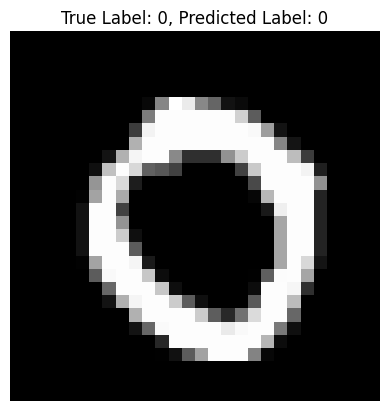

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten the input data
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
# Choose a random test image
index = np.random.randint(0, len(X_test))
test_image = X_test[index]
true_label = y_test[index]
# Make a prediction
prediction = np.argmax(model.predict(test_image.reshape(1, -1)))
# Display the image and prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {prediction}")
plt.axis('off')
plt.show()